# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets


# YOUR CODE HERE!
my_btc = 1.2

my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']


# Fetch current ETH price
# YOUR CODE HERE!
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']


# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $29553.60
The current value of your 5.3 ETH is $9013.55


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv('API_Key_ID')
alpaca_secret_key = os.getenv('secret_keys')

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2023-02-15", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
# YOUR CODE HERE!

df_portfolio


AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2023-02-15 05:00:00+00:00  98.24  98.36  98.03  98.18  6491973       20672   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-02-15 05:00:00+00:00  98.130993  410.35  414.06  409.47  413.98   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-02-15 05:00:00+00:00  61704828      428008  412.265318

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_closing_prices_agg = float(df_portfolio["AGG"]["close"][0])
df_closing_prices_spy = float(df_portfolio["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${df_closing_prices_agg}")
print(f"Current SPY closing price: ${df_closing_prices_spy}")

Current AGG closing price: $98.18
Current SPY closing price: $413.98


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!

my_agg_value = my_agg * df_closing_prices_agg
my_spy_value = my_spy * df_closing_prices_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20699.00
The current value of your 200 AGG shares is $19636.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!

# Consolidate financial assets data
# YOUR CODE HERE!

# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)

NameError: name 'df_savings' is not defined

In [ ]:
# Plot savings pie chart
# YOUR CODE HERE!

In [ ]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

# Validate saving health
# YOUR CODE HERE!

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-02-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-02-15', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])
# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2018-02-15 05:00:00+00:00  106.56  106.7272  106.5300  106.59  3077666   
2018-02-16 05:00:00+00:00  106.85  106.8750  106.7100  106.80  3649182   
2018-02-20 05:00:00+00:00  106.69  106.7099  106.5501  106.69  2910732   
2018-02-21 05:00:00+00:00  106.77  106.8000  106.2601  106.35  3224749   
2018-02-22 05:00:00+00:00  106.49  106.5600  106.3600  106.36  2485375   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2018-02-15 05:00:00+00:00       13125  106.620436  271.57  273.04  268.7700   
2018-02-16 05:00:00+00:00       16270  106.798704  272.32  275.32  272.0355   
2018-02-20 05:00:00+00:00       12273  106.647697  272.03  273.67  270.5000   
2018-02-21 05:00:00+00:00       16041  106.548067  271.89  274.72  269.9400   
2018-02-22 05:00:00+00:00       10499  106.447759  271.10  273.05  269.6400   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-02-15 05:00:00+00:00  272.93  113116760      423202  271.436188  
2018-02-16 05:00:00+00:00  273.16  162074320      424982  273.363894  
2018-02-20 05:00:00+00:00  271.44   87542178      339897  272.115919  
2018-02-21 05:00:00+00:00  269.97   99118727      392252  271.984676  
2018-02-22 05:00:00+00:00  270.26  110763169      404227  270.918163

In [18]:
df_stock_data.tail()

AGG                                              \
                            open     high    low  close   volume trade_count   
timestamp                                                                      
2023-02-09 05:00:00+00:00  99.54  99.5600  98.83  98.85  5594836       23631   
2023-02-10 05:00:00+00:00  98.82  98.8300  98.40  98.42  5068200       18946   
2023-02-13 05:00:00+00:00  98.49  98.7200  98.46  98.72  6833675       17375   
2023-02-14 05:00:00+00:00  98.67  98.7574  98.11  98.37  9559498       23225   
2023-02-15 05:00:00+00:00  98.24  98.3600  98.03  98.18  6491973       20672   

                                         SPY                           \
                                vwap    open    high      low   close   
timestamp                                                               
2023-02-09 05:00:00+00:00  99.234827  414.41  414.57  405.810  407.09   
2023-02-10 05:00:00+00:00  98.520058  405.86  408.44  405.010  408.04   
2023-02-13 05:00:00+00:00  98.638067  408.72  412.97  408.240  412.83   
2023-02-14 05:00:00+00:00  98.377191  411.24  415.05  408.511  412.64   
2023-02-15 05:00:00+00:00  98.130993  410.35  414.06  409.470  413.98   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-02-09 05:00:00+00:00  78709874      567083  409.794927  
2023-02-10 05:00:00+00:00  70769715      489779  407.008915  
2023-02-13 05:00:00+00:00  64923047      427006  411.387098  
2023-02-14 05:00:00+00:00  88412194      628223  412.117226  
2023-02-15 05:00:00+00:00  61704828      428008  412.265318

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [24]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2018-02-15 05:00:00+00:00  106.56  106.7272  106.5300  106.59  3077666   
2018-02-16 05:00:00+00:00  106.85  106.8750  106.7100  106.80  3649182   
2018-02-20 05:00:00+00:00  106.69  106.7099  106.5501  106.69  2910732   
2018-02-21 05:00:00+00:00  106.77  106.8000  106.2601  106.35  3224749   
2018-02-22 05:00:00+00:00  106.49  106.5600  106.3600  106.36  2485375   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-02-15 05:00:00+00:00       13125  106.620436          NaN  271.57   
2018-02-16 05:00:00+00:00       16270  106.798704     0.001970  272.32   
2018-02-20 05:00:00+00:00       12273  106.647697    -0.001030  272.03   
2018-02-21 05:00:00+00:00       16041  106.548067    -0.003187  271.89   
2018-02-22 05:00:00+00:00       10499  106.447759     0.000094  271.10   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2018-02-15 05:00:00+00:00  273.04  268.7700  272.93  113116760      423202   
2018-02-16 05:00:00+00:00  275.32  272.0355  273.16  162074320      424982   
2018-02-20 05:00:00+00:00  273.67  270.5000  271.44   87542178      339897   
2018-02-21 05:00:00+00:00  274.72  269.9400  269.97   99118727      392252   
2018-02-22 05:00:00+00:00  273.05  269.6400  270.26  110763169      404227   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-02-15 05:00:00+00:00  271.436188          NaN  
2018-02-16 05:00:00+00:00  273.363894     0.000843  
2018-02-20 05:00:00+00:00  272.115919    -0.006297  
2018-02-21 05:00:00+00:00  271.984676    -0.005416  
2018-02-22 05:00:00+00:00  270.918163     0.001074

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\shadr\OneDrive\Desktop\UofM-VIRT-FIN-PT-12-2022-U-LOLC\02-Homework\05-APIs\Instructions\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000456,0.987774,0.994590,1.005593,0.995858,0.998835,1.001506,1.007255,1.003288,1.008519,...,0.994098,0.997098,0.997485,1.002109,0.995323,0.999436,1.000762,1.006860,1.000350,1.012717
2,1.004832,0.986458,1.000882,1.000357,1.002325,0.994853,1.003495,0.998672,1.010425,1.017539,...,1.001005,1.000547,1.002287,0.993291,0.988059,1.016175,1.002665,1.003104,0.996726,1.017478
3,0.984151,0.988490,1.003133,1.000493,0.998352,0.998717,0.999713,1.003464,1.017553,1.013393,...,1.011995,0.998567,1.010237,0.994505,0.989494,1.022281,1.003376,1.004825,0.993309,1.015621
4,0.988889,0.981821,0.989647,0.992794,0.999898,0.993111,0.995045,1.013075,1.029762,1.012339,...,1.002107,0.989025,1.016238,0.991872,1.008186,1.013709,0.998659,1.004522,0.990484,1.014132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.623174,2.204262,5.687687,4.561025,4.998486,1.355752,2.615512,1.928222,0.696745,0.993202,...,2.546385,11.232195,4.602097,1.751081,3.977094,5.435463,2.448235,1.611559,3.472882,1.127963
7557,3.621245,2.215881,5.718183,4.562321,5.028112,1.352109,2.585895,1.925683,0.690829,0.995385,...,2.581325,11.226984,4.643241,1.731170,4.019416,5.452786,2.467651,1.599732,3.433243,1.149612
7558,3.611010,2.208338,5.702831,4.549009,5.030307,1.344296,2.583478,1.920767,0.696495,0.994803,...,2.597004,11.091315,4.617878,1.722347,4.050135,5.478542,2.440654,1.601934,3.426975,1.149584
7559,3.633204,2.211522,5.687797,4.545276,5.065025,1.365835,2.571748,1.906001,0.694123,0.987323,...,2.588447,11.172509,4.626229,1.736599,4.064569,5.442968,2.444897,1.590171,3.409033,1.153344


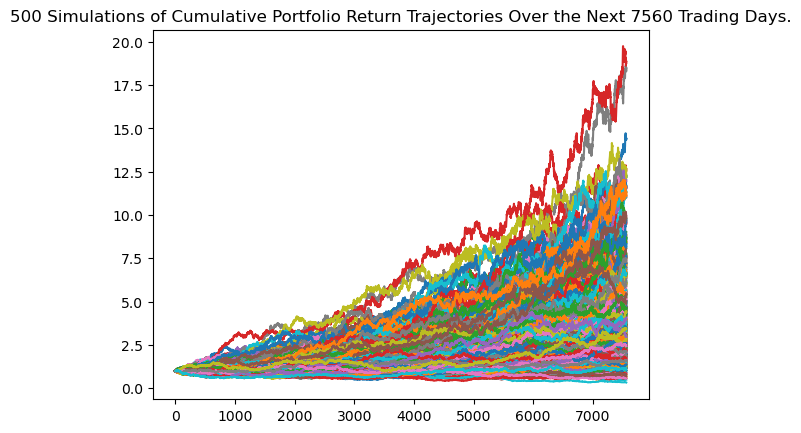

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_30year.plot_simulation()

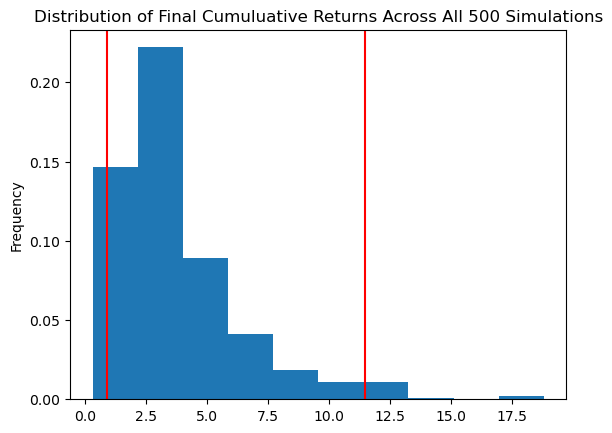

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_30year.plot_distribution()


### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

MC_summary_stat = MC_30year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(MC_summary_stat)

count           500.000000
mean              3.785328
std               2.600006
min               0.329042
25%               2.044953
50%               3.071838
75%               4.600526
max              18.790245
95% CI Lower      0.894598
95% CI Upper     11.463891
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(MC_summary_stat[8]*20000,2)
ci_upper = round(MC_summary_stat[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $17891.95 and $229277.83


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(MC_summary_stat[8]*30000,2)
ci_upper = round(MC_summary_stat[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $26837.93 and $343916.74


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\shadr\OneDrive\Desktop\UofM-VIRT-FIN-PT-12-2022-U-LOLC\02-Homework\05-APIs\Instructions\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999434,1.005249,0.998962,0.994281,1.002367,1.000316,1.000965,0.994482,0.996280,0.998749,...,0.995829,1.009877,0.996192,1.001536,0.993753,1.000502,0.999002,0.990466,1.005536,0.998590
2,0.990770,1.004375,1.005237,0.993263,1.008959,1.008287,1.005453,0.996586,0.995115,0.996905,...,0.992924,1.000271,0.992814,0.996332,0.999503,0.992857,1.006100,0.992695,1.003985,0.991027
3,0.986733,1.000498,1.010676,1.000616,1.013692,0.999522,1.012534,1.003810,0.992046,0.998827,...,0.989106,1.003010,0.994029,0.992382,0.997014,1.001620,1.005874,0.994947,1.002510,0.976436
4,0.991572,0.999524,1.015659,1.001056,1.019477,0.999064,1.011773,1.009655,0.997849,1.004797,...,0.990982,1.001450,0.998824,0.996092,0.995701,0.994152,1.008449,0.992060,0.997955,0.972299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.166098,0.711169,1.664430,0.815996,1.447764,1.974302,1.219122,1.217138,0.916887,0.991285,...,1.044087,1.458239,1.027388,1.243334,1.575221,1.254073,1.304589,1.328000,1.387885,0.909775
1257,1.169539,0.717519,1.675260,0.812664,1.450760,1.967388,1.212389,1.205415,0.924100,0.989560,...,1.051150,1.457774,1.035301,1.244525,1.582540,1.249200,1.303236,1.328618,1.394967,0.908454
1258,1.168583,0.720425,1.672349,0.815749,1.457266,1.967931,1.207073,1.203868,0.929738,0.993381,...,1.061900,1.445655,1.035601,1.249844,1.594177,1.261860,1.321499,1.326731,1.392417,0.908732
1259,1.174999,0.717486,1.666163,0.815978,1.459596,1.981260,1.210228,1.212059,0.923818,0.987163,...,1.058616,1.448170,1.035705,1.250304,1.588556,1.257586,1.339543,1.332607,1.386638,0.903625


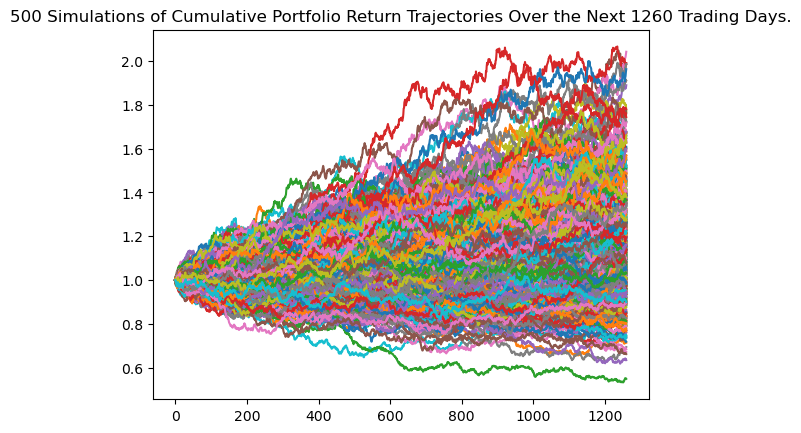

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_5year.plot_simulation()

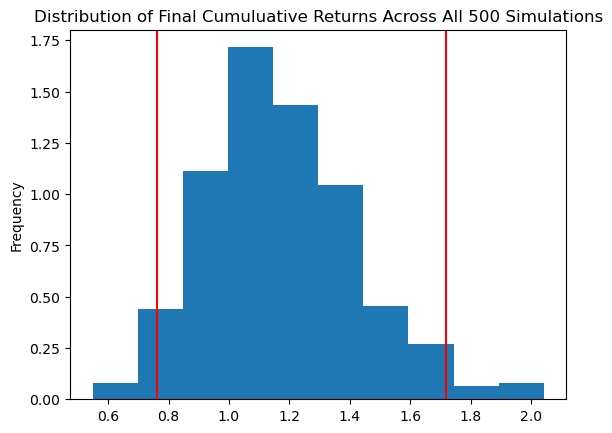

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_5year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_summary_stat = MC_5year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(MC_summary_stat)

count           500.000000
mean              1.174088
std               0.245618
min               0.549527
25%               1.004801
50%               1.146372
75%               1.323421
max               2.041499
95% CI Lower      0.763342
95% CI Upper      1.719183
Name: 1260, dtype: float64


In [38]:
# Set initial investment
# YOUR CODE HERE!

initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(MC_summary_stat[8]*20000,2)
ci_upper_five = round(MC_summary_stat[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $15266.84 and $34383.66


### Ten Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [40]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\shadr\OneDrive\Desktop\UofM-VIRT-FIN-PT-12-2022-U-LOLC\02-Homework\05-APIs\Instructions\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987722,1.010947,0.994987,0.995956,1.012329,1.002235,1.000376,1.008345,0.992869,0.996291,...,0.986431,0.998332,0.999714,1.004840,0.997249,0.993514,1.009446,1.007739,1.001068,1.000757
2,0.982888,1.012010,0.990115,0.992322,1.019745,1.000601,1.000786,1.001901,0.993219,0.993757,...,0.986759,0.998857,0.994059,1.003913,1.003981,0.998419,1.005637,1.011658,0.991862,0.989481
3,0.983269,1.009374,0.993019,0.988311,1.024507,1.001932,0.983983,0.994114,0.989102,0.980600,...,0.990681,1.005348,0.999756,1.013278,1.007743,1.003561,1.011845,1.008007,0.994461,0.988601
4,0.983523,1.010949,0.986797,0.979473,1.020042,0.991181,0.988793,0.995351,0.984241,0.971116,...,0.990017,1.006139,1.002529,1.013293,1.001027,1.002527,1.018789,1.014771,0.990095,0.997642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.228509,1.396883,1.185918,1.313409,1.372673,1.109102,1.138319,1.158662,1.506206,1.567413,...,1.158719,1.299889,1.670403,1.428495,1.169081,0.948952,1.574863,2.268089,0.851590,0.894192
2517,1.233136,1.386802,1.184120,1.309505,1.368510,1.099421,1.131284,1.156398,1.499457,1.574262,...,1.154135,1.299620,1.665361,1.424571,1.149890,0.955655,1.585920,2.285472,0.845185,0.894337
2518,1.216965,1.391146,1.189083,1.316446,1.380356,1.101804,1.125087,1.156031,1.504411,1.580929,...,1.155016,1.297325,1.644559,1.434576,1.156882,0.964634,1.592004,2.293576,0.846256,0.895638
2519,1.226457,1.396331,1.192537,1.323777,1.395244,1.097339,1.119610,1.146079,1.493709,1.581827,...,1.150710,1.301792,1.646998,1.437572,1.148566,0.978686,1.585963,2.304224,0.849661,0.893710


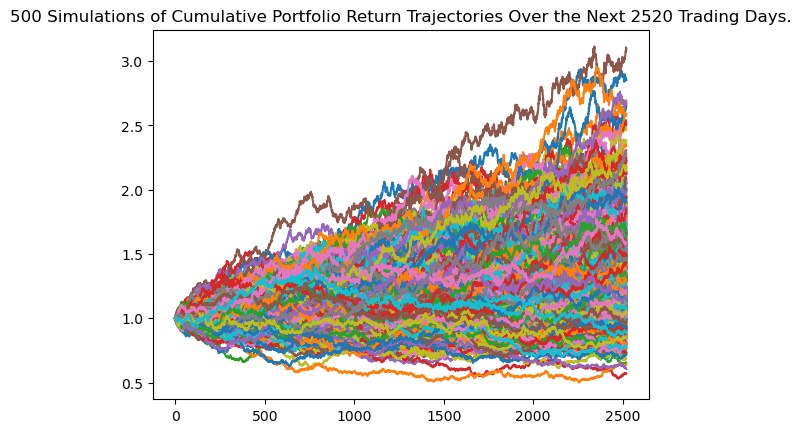

In [41]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_10year.plot_simulation()

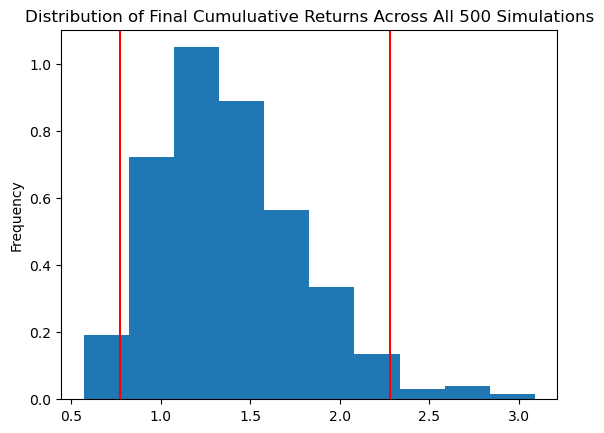

In [42]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_10year.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_summary_stat = MC_10year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(MC_summary_stat)

count           500.000000
mean              1.389392
std               0.402055
min               0.572465
25%               1.093728
50%               1.332505
75%               1.627026
max               3.087718
95% CI Lower      0.774412
95% CI Upper      2.277442
Name: 2520, dtype: float64


In [44]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_ten = round(MC_summary_stat[8]*30000,2)
ci_upper_ten = round(MC_summary_stat[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $23232.35 and $68323.26
